# ETL Movies:

# AWS:

In [134]:
csv_list = ['../Datasets/movi/amazon_prime_titles.csv','../Datasets/movi/disney_plus_titles.csv','../Datasets/movi/hulu_titles.csv','../Datasets/movi/netflix_titles.csv']
lista_plat = ['aws','disney plus','hulu','netflix']
lista_letras = ['a','d','h','n']

# por ahora no utilizadas

In [135]:
import pandas as pd

dfaws = pd.read_csv(r'../Datasets/movi/amazon_prime_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # importo CSV.

dfaws.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [136]:
dfaws = dfaws.drop_duplicates() #borro duplicates

In [137]:
dfaws = dfaws.assign(plataforma='AWS') #discrimino la plataforma para luego poder diferenciar en el df maestro
dfaws['id'] = dfaws['show_id'].apply(lambda x: 'a' + str(x)) # agrego segun consigna la info a id column. Guardandola ahora como "id"

dfaws = dfaws.drop('show_id', axis=1) # elimino vieja columna "show_id".
dfaws = dfaws[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando la nueva columna "id" en lugar de "show_id"

In [138]:
dfaws['rating'] = dfaws['rating'].fillna('G') #relleno nulos de rating seguun consigna con "G"

In [139]:
# De haber fechas, deberán tener el formato AAAA-mm-dd...
dfaws['date_added'] = pd.to_datetime(dfaws['date_added']) # transformo a formato date
dfaws['date_added'] = dfaws['date_added'].dt.strftime('%Y-%m-%d')  #cambio el formato de las fechas reordenando

In [140]:
dfaws = dfaws.applymap(lambda x: x.lower() if type(x) == str else x) #Transformo todo en minusculas por simplicidad y p/ evitar futuros errores.

dfaws[['duration_int', 'duration_type']] = dfaws['duration'].str.extract('(\d+) (\D+)') # Separo columna duration en duration_int (solo minutos) y duration type (seasons)
dfaws = dfaws.drop('duration', axis=1) # elimino vieja columna "duration" ya sustituida por las anteriores
dfaws = dfaws[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int','duration_type', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando duration con duration_int y duration_type
# se observo en este dataframe valores faltantes en cast director country y date added (este ultimo será sustituido por el promedio del resto de las peliculas registradas en el csv, para minimizar la pérdida de datos)


In [141]:


# convierte la columna date_added a tipo datetime
dfaws['date_added'] = pd.to_datetime(dfaws['date_added'], errors='coerce')

# elige la fecha promedio y reemplaza los valores nulos en la columna date_added
date_mean = dfaws['date_added'].mean()
dfaws['date_added'].fillna(date_mean, inplace=True)

# selecciona sólo la fecha y conviértela en formato AAAA-mm-dd
dfaws['date_added'] = pd.Series(dfaws['date_added'].values).dt.strftime('%Y-%m-%d')

#completo el resto de faltantes con unknown
#dfaws.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.


In [142]:
#transformacion de todos los tipos de datos presentes en el df.
dfaws['id'] = dfaws['id'].astype('object')
dfaws['plataforma'] = dfaws['plataforma'].astype('category')
dfaws['type'] = dfaws['type'].astype('category')
dfaws['title'] = dfaws['title'].astype('object')
dfaws['director'] = dfaws['director'].astype('object')
dfaws['cast'] = dfaws['cast'].astype('object')
dfaws['country'] = dfaws['country'].astype('category')
dfaws['date_added'] = pd.to_datetime(dfaws['date_added'])
dfaws['release_year'] = dfaws['release_year'].astype('int64')
dfaws['rating'] = dfaws['rating'].astype('category')
dfaws['duration_int'] = dfaws['duration_int'].astype('int64')
dfaws['duration_type'] = dfaws['duration_type'].astype('category')
dfaws['listed_in'] = dfaws['listed_in'].astype('category')
dfaws['description'] = dfaws['description'].astype('object')


In [143]:
dfaws.head()

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...


In [144]:
import missingno as msno


<Axes: >

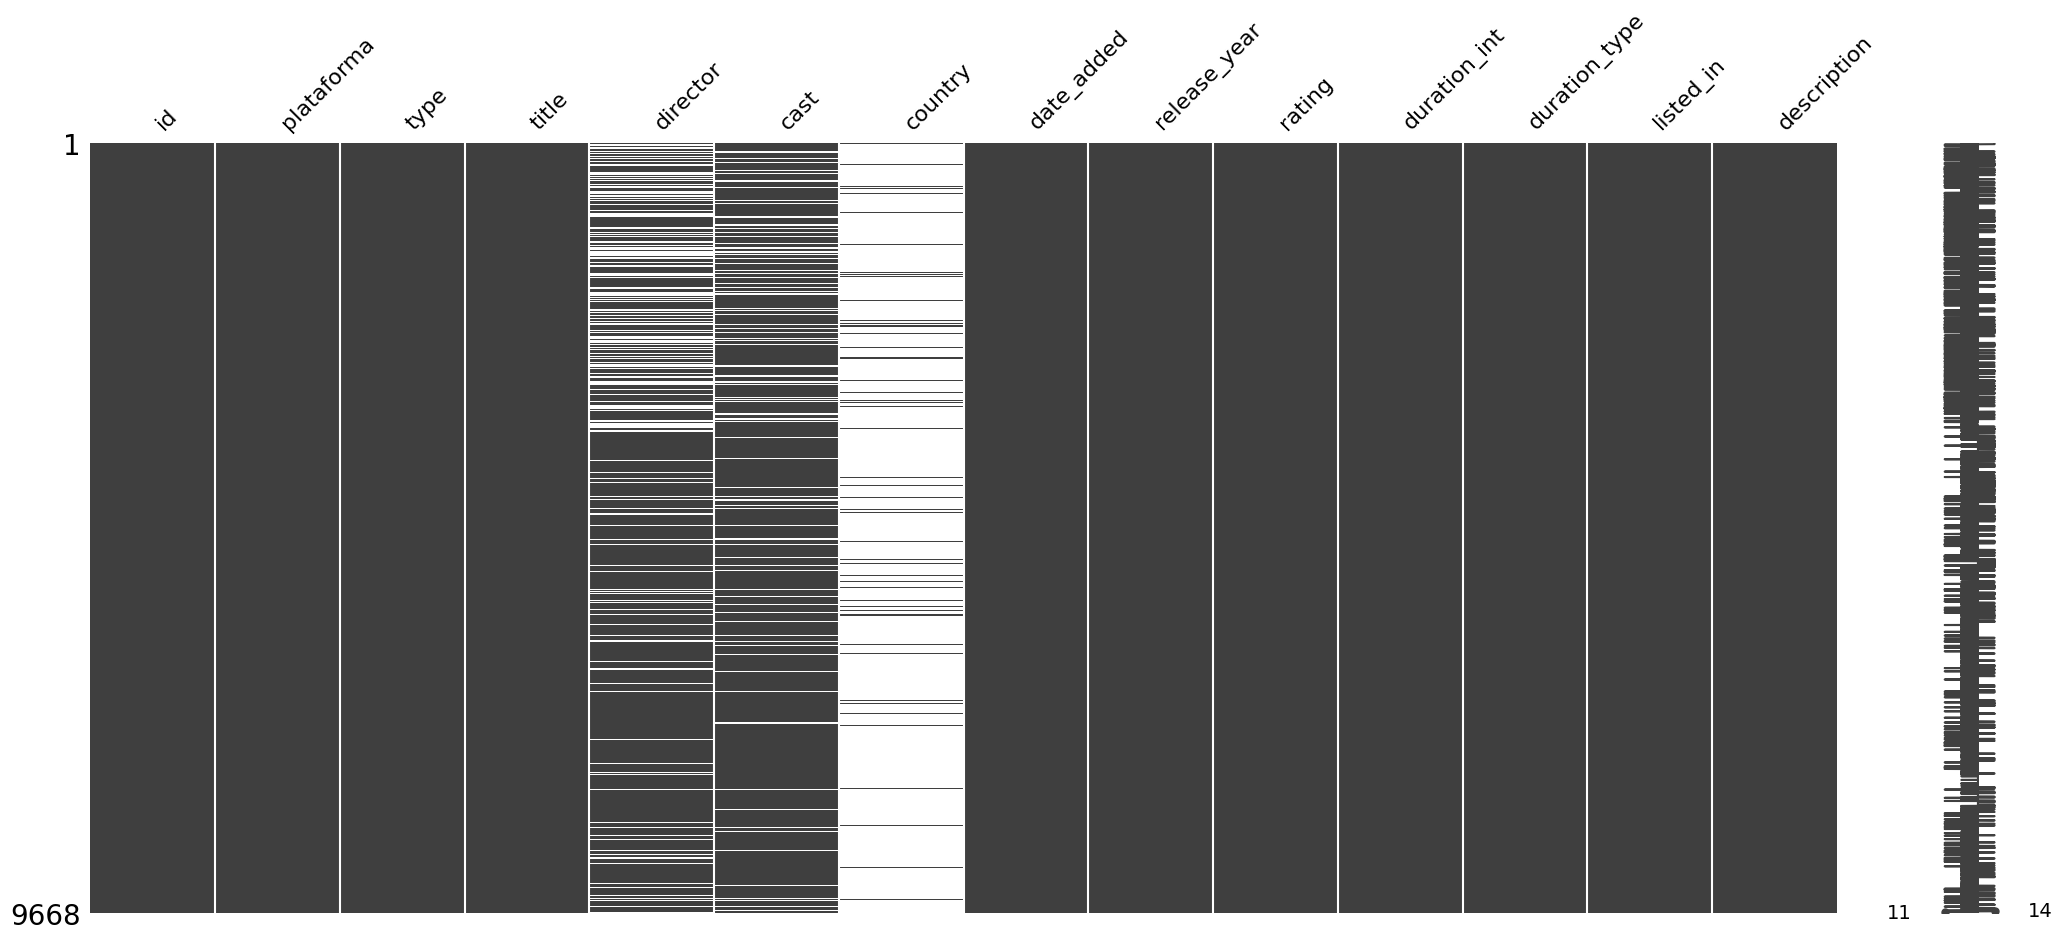

In [145]:
msno.matrix(dfaws)

# Disney Plus:


In [146]:
import pandas as pd

dfdp = pd.read_csv(r'../Datasets/movi/disney_plus_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # importo CSV.

dfdp = dfdp.drop_duplicates() #borro duplicates

dfdp['id'] = dfdp['show_id'].apply(lambda x: 'a' + str(x)) # agrego segun consigna la info a id column. Guardandola ahora como "id"
dfdp = dfdp.assign(plataforma='Disney Plus') #discrimino la plataforma para luego poder diferenciar en el df maestro
dfdp = dfdp.drop('show_id', axis=1) # elimino vieja columna "show_id".
dfdp = dfdp[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando la nueva columna "id" en lugar de "show_id"

dfdp['rating'] = dfdp['rating'].fillna('G') #relleno nulos de rating seguun consigna con "G"

# De haber fechas, deberán tener el formato AAAA-mm-dd...
dfdp['date_added'] = pd.to_datetime(dfdp['date_added']) # transformo a formato date
dfdp['date_added'] = dfdp['date_added'].dt.strftime('%Y-%m-%d')  #cambio el formato de las fechas reordenando

dfdp = dfdp.applymap(lambda x: x.lower() if type(x) == str else x) #Transformo todo en minusculas por simplicidad y p/ evitar futuros errores.

dfdp[['duration_int', 'duration_type']] = dfdp['duration'].str.extract('(\d+) (\D+)') # Separo columna duration en duration_int (solo minutos) y duration type (seasons)
dfdp = dfdp.drop('duration', axis=1) # elimino vieja columna "duration" ya sustituida por las anteriores
dfdp = dfdp[['id','plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int','duration_type', 'listed_in', 'description']] # reordeno para mayor comodidad, reemplazando duration con duration_int y duration_type

# se observo en este dataframe valores faltantes en cast director country y date added (este ultimo será sustituido por el promedio del resto de las peliculas registradas en el csv, para minimizar la pérdida de datos)

# convierte la columna date_added a tipo datetime
dfdp['date_added'] = pd.to_datetime(dfdp['date_added'], errors='coerce')

# elige la fecha promedio y reemplaza los valores nulos en la columna date_added
date_mean = dfdp['date_added'].mean()
dfdp['date_added'].fillna(date_mean, inplace=True)

# selecciona sólo la fecha y conviértela en formato AAAA-mm-dd
dfdp['date_added'] = pd.Series(dfdp['date_added'].values).dt.strftime('%Y-%m-%d')


#completo el resto de faltantes con unknown
#dfdp.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.



#transformacion de todos los tipos de datos presentes en el df.
dfdp['id'] = dfdp['id'].astype('object')
dfdp['plataforma'] = dfdp['plataforma'].astype('category')
dfdp['type'] = dfdp['type'].astype('category')
dfdp['title'] = dfdp['title'].astype('object')
dfdp['director'] = dfdp['director'].astype('object')
dfdp['cast'] = dfdp['cast'].astype('object')
dfdp['country'] = dfdp['country'].astype('category')
dfdp['date_added'] = pd.to_datetime(dfdp['date_added'])
dfdp['release_year'] = dfdp['release_year'].astype('int64')
dfdp['rating'] = dfdp['rating'].astype('category')
dfdp['duration_int'] = dfdp['duration_int'].astype('int64')
dfdp['duration_type'] = dfdp['duration_type'].astype('category')
dfdp['listed_in'] = dfdp['listed_in'].astype('category')
dfdp['description'] = dfdp['description'].astype('object')


In [147]:
dfdp.head(20)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,disney plus,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",NaN,2021-11-26,2016,tv-g,23,min,"animation, family",join mickey and the gang as they duck the halls!
1,as2,disney plus,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",NaN,2021-11-26,1988,pg,91,min,comedy,santa claus passes his magic bag to a new st. ...
2,as3,disney plus,movie,ice age: a mammoth christmas,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,23,min,"animation, comedy, family",sid the sloth is on santa's naughty list.
3,as4,disney plus,movie,the queen family singalong,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",NaN,2021-11-26,2021,tv-pg,41,min,musical,"this is real life, not just fantasy!"
4,as5,disney plus,tv show,the beatles: get back,NaN,"john lennon, paul mccartney, george harrison, ...",NaN,2021-11-25,2021,g,1,season,"docuseries, historical, music",a three-part documentary from peter jackson ca...
5,as6,disney plus,movie,becoming cousteau,liz garbus,"jacques yves cousteau, vincent cassel",united states,2021-11-24,2021,pg-13,94,min,"biographical, documentary",an inside look at the legendary life of advent...
6,as7,disney plus,tv show,hawkeye,NaN,"jeremy renner, hailee steinfeld, vera farmiga,...",NaN,2021-11-24,2021,tv-14,1,season,"action-adventure, superhero",clint barton/hawkeye must team up with skilled...
7,as8,disney plus,tv show,port protection alaska,NaN,"gary muehlberger, mary miller, curly leach, sa...",united states,2021-11-24,2015,tv-14,2,seasons,"docuseries, reality, survival",residents of port protection must combat volat...
8,as9,disney plus,tv show,secrets of the zoo: tampa,NaN,"dr. ray ball, dr. lauren smith, chris massaro,...",united states,2021-11-24,2019,tv-pg,2,seasons,"animals & nature, docuseries, family",a day in the life at zootampa is anything but ...
9,as10,disney plus,movie,a muppets christmas: letters to santa,kirk r. thatcher,"steve whitmire, dave goelz, bill barretta, eri...",united states,2021-11-19,2008,g,45,min,"comedy, family, musical",celebrate the holiday season with all your fav...


<Axes: >

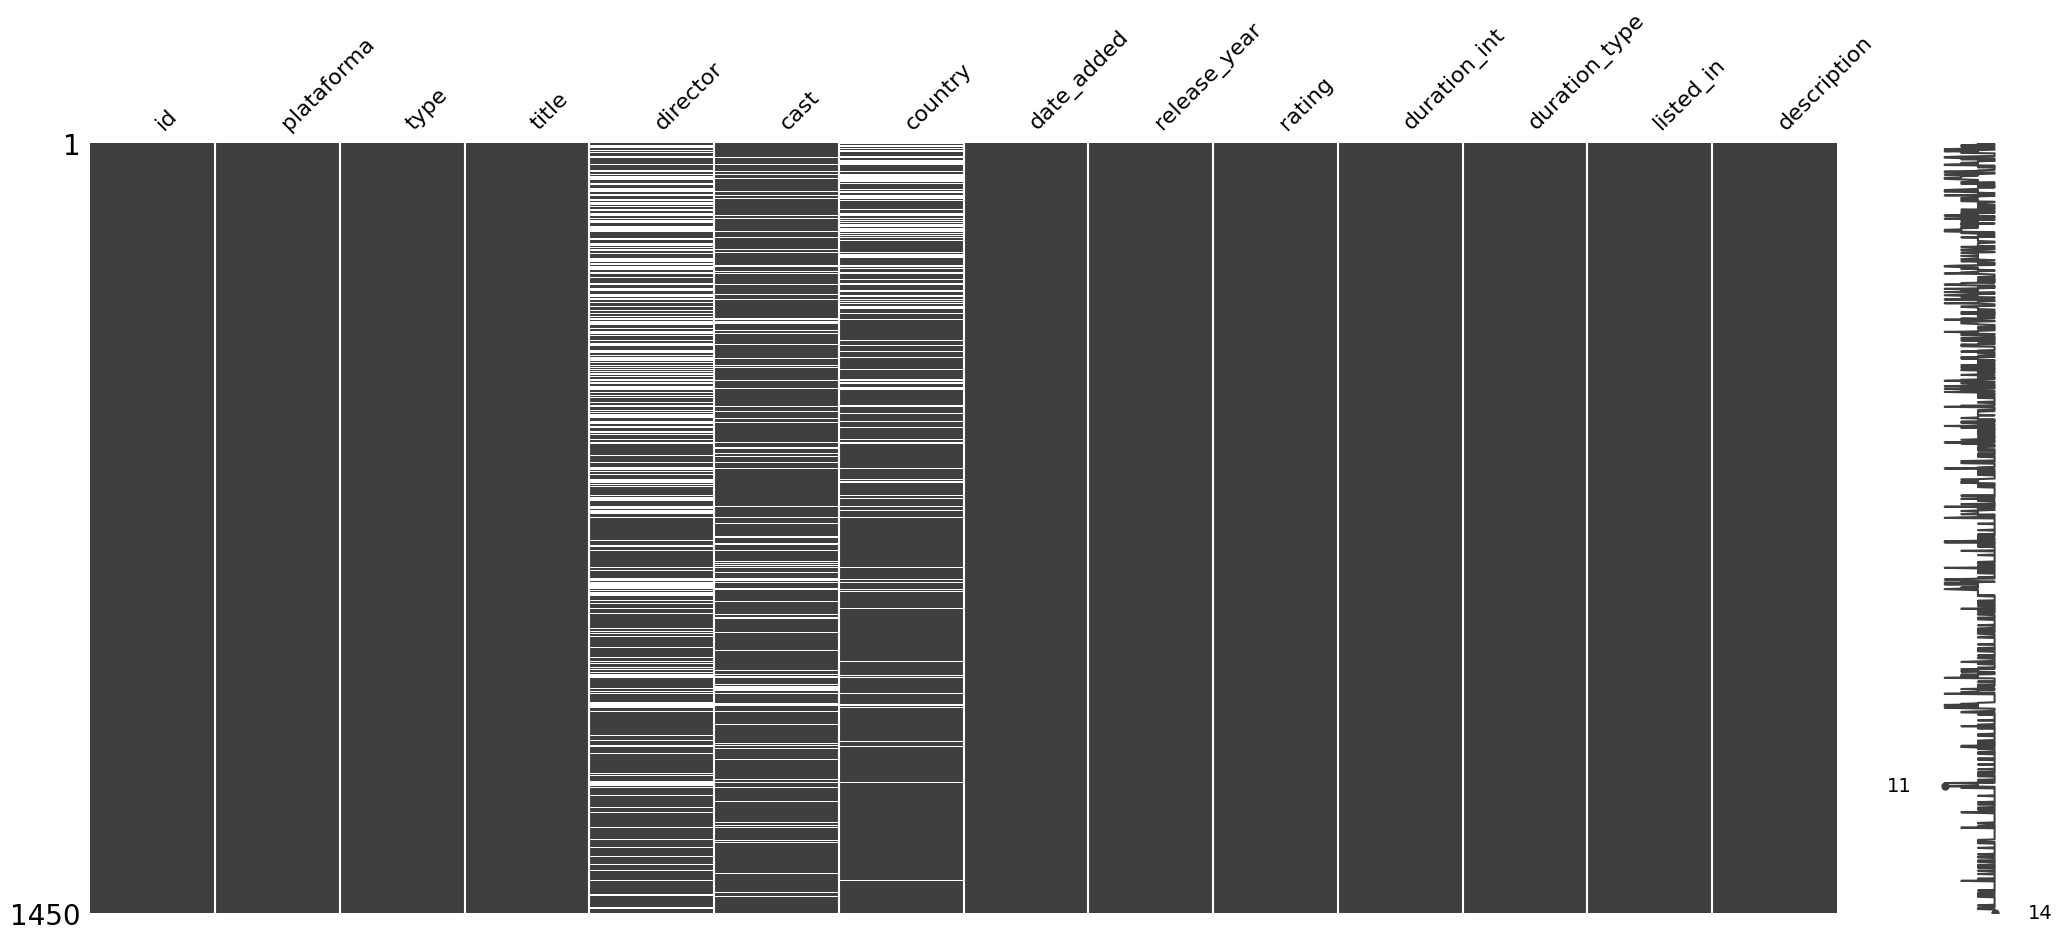

In [148]:
msno.matrix(dfdp)

# Hulu:

In [149]:
import pandas as pd # en ingles, solo para practicar.. XD

df_hulu = pd.read_csv(r'../Datasets/movi/hulu_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.') # import CSV.

df_hulu = df_hulu.drop_duplicates() # drop duplicates

df_hulu['id'] = df_hulu['show_id'].apply(lambda x: 'b' + str(x)) # add info to id column as instructed, now saved as "id"
df_hulu = df_hulu.assign(plataforma='Hulu') # discriminate platform to later differentiate in the master df
df_hulu = df_hulu.drop('show_id', axis=1) # remove old "show_id" column
df_hulu = df_hulu[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']] # reorder for convenience, replacing the new "id" column instead of "show_id"

df_hulu['rating'] = df_hulu['rating'].fillna('G') # fill in missing ratings as instructed with "G"

# If there are dates, they should have the format YYYY-mm-dd...
df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added']) # convert to date format
df_hulu['date_added'] = df_hulu['date_added'].dt.strftime('%Y-%m-%d') # rearrange date format

df_hulu = df_hulu.applymap(lambda x: x.lower() if type(x) == str else x) # convert everything to lowercase for simplicity and to avoid future errors.

df_hulu[['duration_int', 'duration_type']] = df_hulu['duration'].str.extract('(\d+) (\D+)') # Separate duration column into duration_int (only minutes) and duration type (seasons)
df_hulu = df_hulu.drop('duration', axis=1) # remove old "duration" column already replaced by the previous ones
df_hulu = df_hulu[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description']] # reorder for convenience, replacing duration with duration_int and duration_type
df_hulu.isnull().sum()


# Missing values were observed in cast, director, country, and some more..  and date added columns (the latter will be replaced by the average of the rest of the movies recorded in the CSV to minimize data loss)

# Convert the date_added column to datetime type
df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added'], errors='coerce')

# Choose the mean date and replace the null values in the date_added column
date_mean = df_hulu['date_added'].mean()
df_hulu['date_added'].fillna(date_mean, inplace=True)

# Select only the date and convert it to YYYY-mm-dd format
df_hulu['date_added'] = pd.Series(df_hulu['date_added'].values).dt.strftime('%Y-%m-%d')


# Choose the mean duration_int and replace the null values in the duration_int column
df_hulu['duration_int'] = df_hulu['duration_int'].astype(float)
duration_int_mean = df_hulu['duration_int'].mean()
df_hulu['duration_int'].fillna(duration_int_mean, inplace=True)



#completo el resto de faltantes con unknown
#df_hulu.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.

# transformación de todos los tipos de datos presentes en el df
df_hulu['id'] = df_hulu['id'].astype('object')
df_hulu['plataforma'] = df_hulu['plataforma'].astype('category')
df_hulu['type'] = df_hulu['type'].astype('category')
df_hulu['title'] = df_hulu['title'].astype('object')
df_hulu['director'] = df_hulu['director'].astype('object')
df_hulu['cast'] = df_hulu['cast'].astype('object')
df_hulu['country'] = df_hulu['country'].astype('category')
df_hulu['date_added'] = pd.to_datetime(df_hulu['date_added'])
df_hulu['release_year'] = df_hulu['release_year'].astype('int64')
df_hulu['rating'] = df_hulu['rating'].astype('category')
df_hulu['duration_int'] = df_hulu['duration_int'].astype('int64')
df_hulu['duration_type'] = df_hulu['duration_type'].astype('category')
df_hulu['listed_in'] = df_hulu['listed_in'].astype('category')
df_hulu['description'] = df_hulu['description'].astype('object')


In [150]:
df_hulu.head(5)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,bs1,hulu,movie,ricky velez: here's everything,NaN,NaN,NaN,2021-10-24,2021,tv-ma,39,NaN,"comedy, stand up",​comedian ricky velez bares it all with his ho...
1,bs2,hulu,movie,silent night,NaN,NaN,NaN,2021-10-23,2020,g,94,min,"crime, drama, thriller","mark, a low end south london hitman recently r..."
2,bs3,hulu,movie,the marksman,NaN,NaN,NaN,2021-10-23,2021,pg-13,108,min,"action, thriller",a hardened arizona rancher tries to protect an...
3,bs4,hulu,movie,gaia,NaN,NaN,NaN,2021-10-22,2021,r,97,min,horror,a forest ranger and two survivalists with a cu...
4,bs5,hulu,movie,settlers,NaN,NaN,NaN,2021-10-22,2021,g,104,min,"science fiction, thriller",mankind's earliest settlers on the martian fro...


<Axes: >

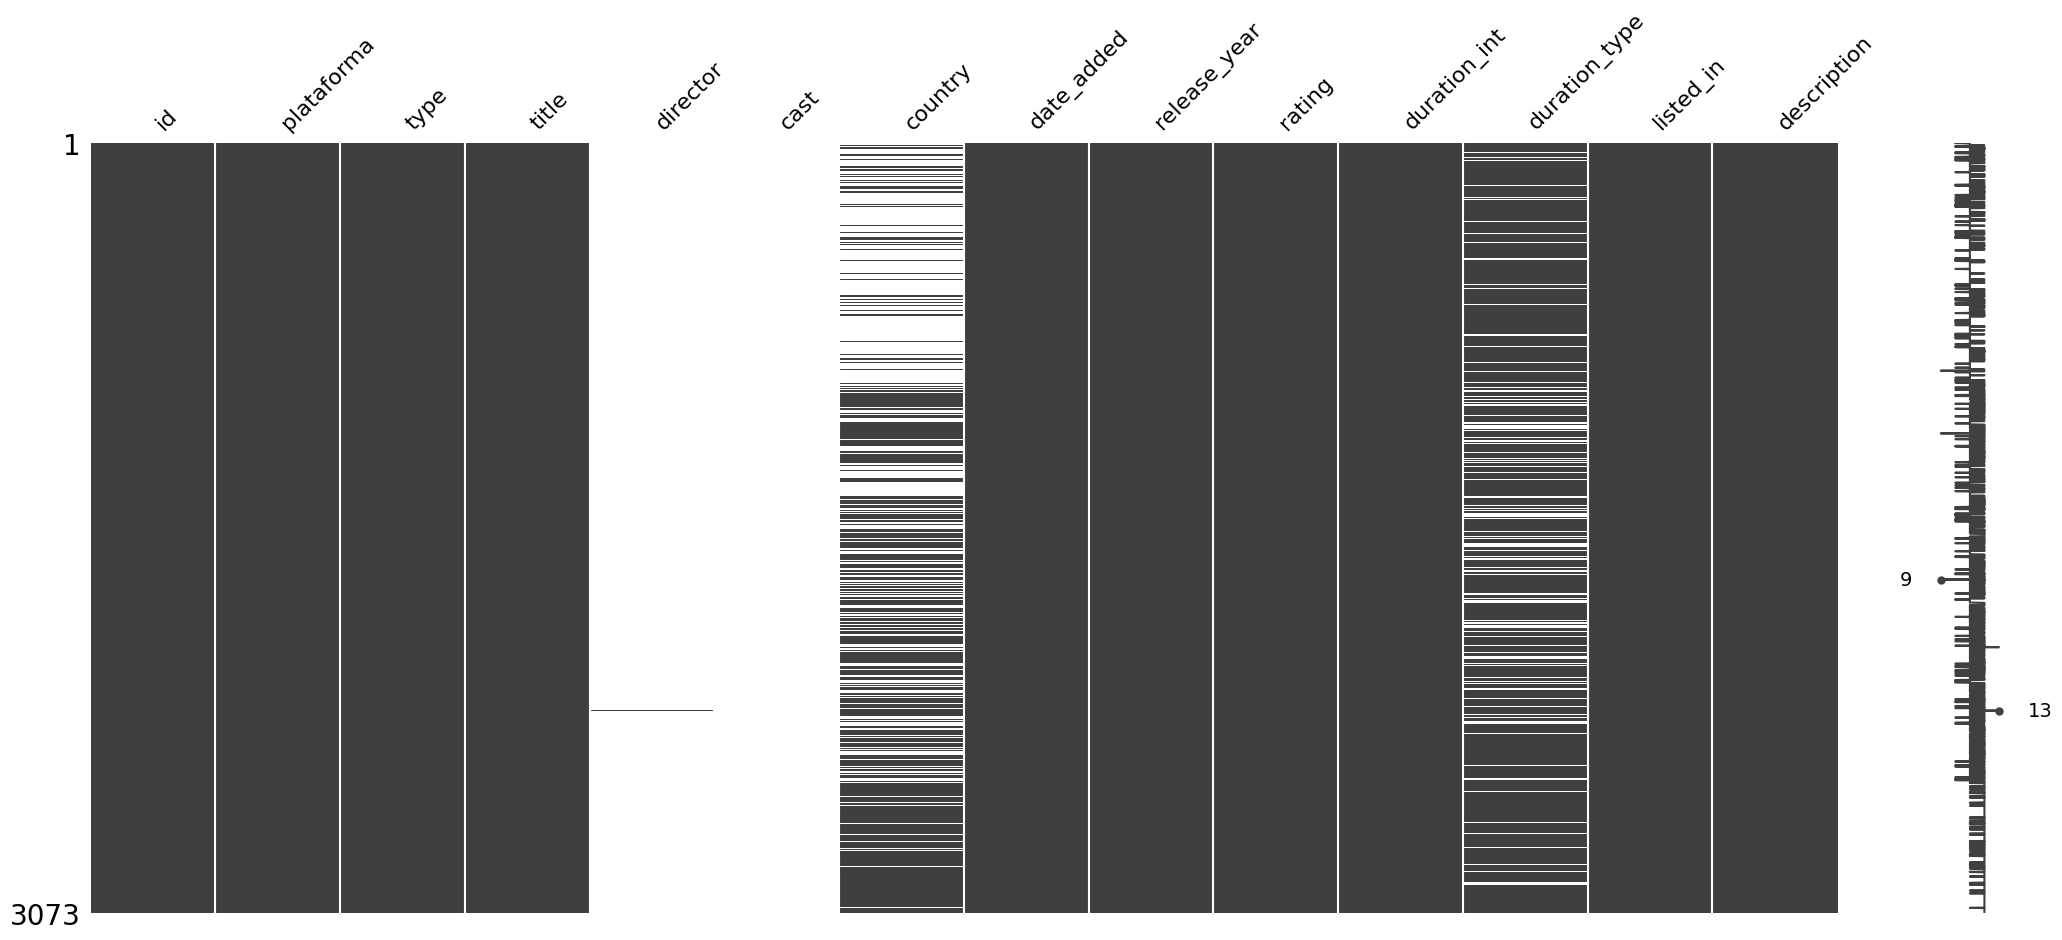

In [151]:
msno.matrix(df_hulu)

In [152]:
import pandas as pd

df_netflix = pd.read_csv(r'../Datasets/movi/netflix_titles.csv', sep=',', encoding='UTF-8', thousands=',', decimal='.')
df_netflix = df_netflix.drop_duplicates()

df_netflix['id'] = df_netflix['show_id'].apply(lambda x: 'b' + str(x))
df_netflix = df_netflix.assign(plataforma='Netflix')
df_netflix = df_netflix.drop('show_id', axis=1)
df_netflix = df_netflix[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']]

df_netflix['rating'] = df_netflix['rating'].fillna('G')

df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
date_mean = df_netflix['date_added'].mean()
df_netflix['date_added'].fillna(date_mean, inplace=True)
df_netflix['date_added'] = df_netflix['date_added'].dt.strftime('%Y-%m-%d')

df_netflix = df_netflix.applymap(lambda x: x.lower() if type(x) == str else x)
df_netflix[['duration_int', 'duration_type']] = df_netflix['duration'].str.extract('(\d+) (\D+)')
df_netflix = df_netflix.drop('duration', axis=1)
df_netflix = df_netflix[['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in', 'description']]
df_netflix.isnull().sum()

# Convert duration_int column to float
df_netflix['duration_int'] = df_netflix['duration_int'].astype(float)

# Fill missing values with mean duration_int
duration_int_mean = df_netflix['duration_int'].mean()
df_netflix['duration_int'].fillna(duration_int_mean, inplace=True)

df_netflix.fillna('unknown', inplace=True)
df_netflix['id'] = df_netflix['id'].astype('object')
df_netflix['plataforma'] = df_netflix['plataforma'].astype('category')
df_netflix['type'] = df_netflix['type'].astype('category')
df_netflix['title'] = df_netflix['title'].astype('object')
df_netflix['director'] = df_netflix['director'].astype('object')
df_netflix['cast'] = df_netflix['cast'].astype('object')
df_netflix['country'] = df_netflix['country'].astype('category')
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
df_netflix['date_added'].fillna(date_mean, inplace=True)
df_netflix['date_added'] = df_netflix['date_added'].dt.strftime('%Y-%m-%d')

df_netflix['release_year'] = df_netflix['release_year'].astype('int64')
df_netflix['rating'] = df_netflix['rating'].astype('category')
df_netflix['duration_int'] = df_netflix['duration_int'].astype('int64')
df_netflix['duration_type'] = df_netflix['duration_type'].astype('category')
df_netflix['listed_in'] = df_netflix['listed_in'].astype('category')
df_netflix['description'] = df_netflix['description'].astype('object')



In [153]:
df_netflix.head(10)

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,bs1,netflix,movie,dick johnson is dead,kirsten johnson,unknown,united states,2021-09-25,2020,pg-13,90,min,documentaries,"as her father nears the end of his life, filmm..."
1,bs2,netflix,tv show,blood & water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,2,seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,bs3,netflix,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",unknown,2021-09-24,2021,tv-ma,1,season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,bs4,netflix,tv show,jailbirds new orleans,unknown,unknown,unknown,2021-09-24,2021,tv-ma,1,season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,bs5,netflix,tv show,kota factory,unknown,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,2,seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...
5,bs6,netflix,tv show,midnight mass,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",unknown,2021-09-24,2021,tv-ma,1,season,"tv dramas, tv horror, tv mysteries",the arrival of a charismatic young priest brin...
6,bs7,netflix,movie,my little pony: a new generation,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",unknown,2021-09-24,2021,pg,91,min,children & family movies,equestria's divided. but a bright-eyed hero be...
7,bs8,netflix,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,tv-ma,125,min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s..."
8,bs9,netflix,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,2021-09-24,2021,tv-14,9,seasons,"british tv shows, reality tv",a talented batch of amateur bakers face off in...
9,bs10,netflix,movie,the starling,theodore melfi,"melissa mccarthy, chris o'dowd, kevin kline, t...",united states,2021-09-24,2021,pg-13,104,min,"comedies, dramas",a woman adjusting to life after a loss contend...


<Axes: >

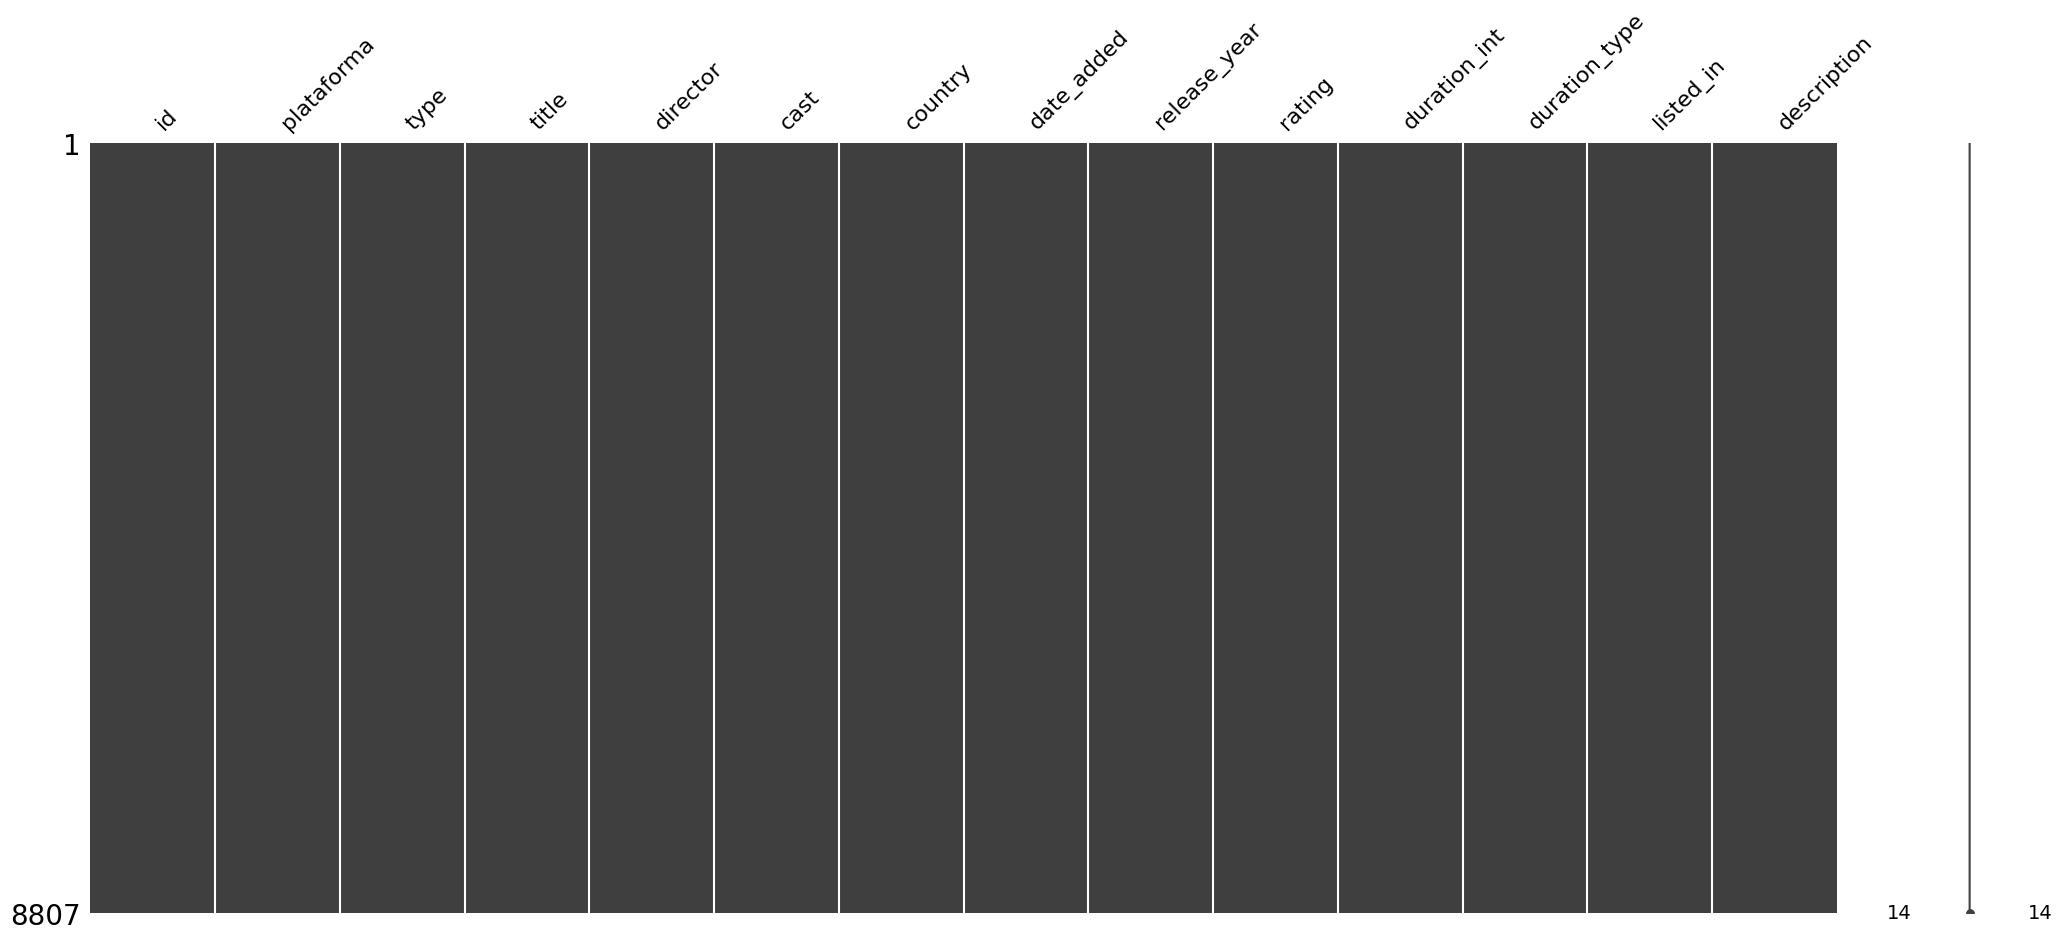

In [154]:
msno.matrix(df_netflix)

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# df_movies: El concatenado.

In [155]:
# Crea una lista con todos los dataframes
dataframes = [dfaws, dfdp, df_hulu, df_netflix]

# Concatena los dataframes en uno solo
df_movies = pd.concat(dataframes)

# Si deseas restablecer los índices del dataframe concatenado
df_movies.reset_index(drop=True, inplace=True)

# Muestra el dataframe concatenado
df_movies

,id,plataforma,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description
0,as1,aws,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30 00:00:00,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,aws,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30 00:00:00,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...
2,as3,aws,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30 00:00:00,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...
3,as4,aws,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30 00:00:00,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ..."
4,as5,aws,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30 00:00:00,1989,g,45,min,"drama, fantasy",teenage matt banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993,bs8803,netflix,movie,zodiac,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...",united states,2019-11-20,2007,r,158,min,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
22994,bs8804,netflix,tv show,zombie dumb,unknown,unknown,unknown,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g..."
22995,bs8805,netflix,movie,zombieland,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",united states,2019-11-01,2009,r,88,min,"comedies, horror movies",looking to survive in a world taken over by zo...
22996,bs8806,netflix,movie,zoom,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...",united states,2020-01-11,2006,pg,88,min,"children & family movies, comedies","dragged from civilian life, a former superhero..."


In [156]:

#completo el resto de faltantes con unknown
#df_movies.fillna('unknown', inplace=True) # fill in remaining missing values in country, cast, director with "unknown" to minimize data loss.

# transformación de todos los tipos de datos presentes en el df
df_movies['id'] = df_movies['id'].astype('object')
df_movies['plataforma'] = df_movies['plataforma'].astype('category')
df_movies['type'] = df_movies['type'].astype('category')
df_movies['title'] = df_movies['title'].astype('object')
df_movies['director'] = df_movies['director'].astype('object')
df_movies['cast'] = df_movies['cast'].astype('object')
df_movies['country'] = df_movies['country'].astype('category')
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])
df_movies['release_year'] = df_movies['release_year'].astype('int64')
df_movies['rating'] = df_movies['rating'].astype('category')
df_movies['duration_int'] = df_movies['duration_int'].astype('int64')
df_movies['duration_type'] = df_movies['duration_type'].astype('category')
df_movies['listed_in'] = df_movies['listed_in'].astype('category')
df_movies['description'] = df_movies['description'].astype('object')


<Axes: >

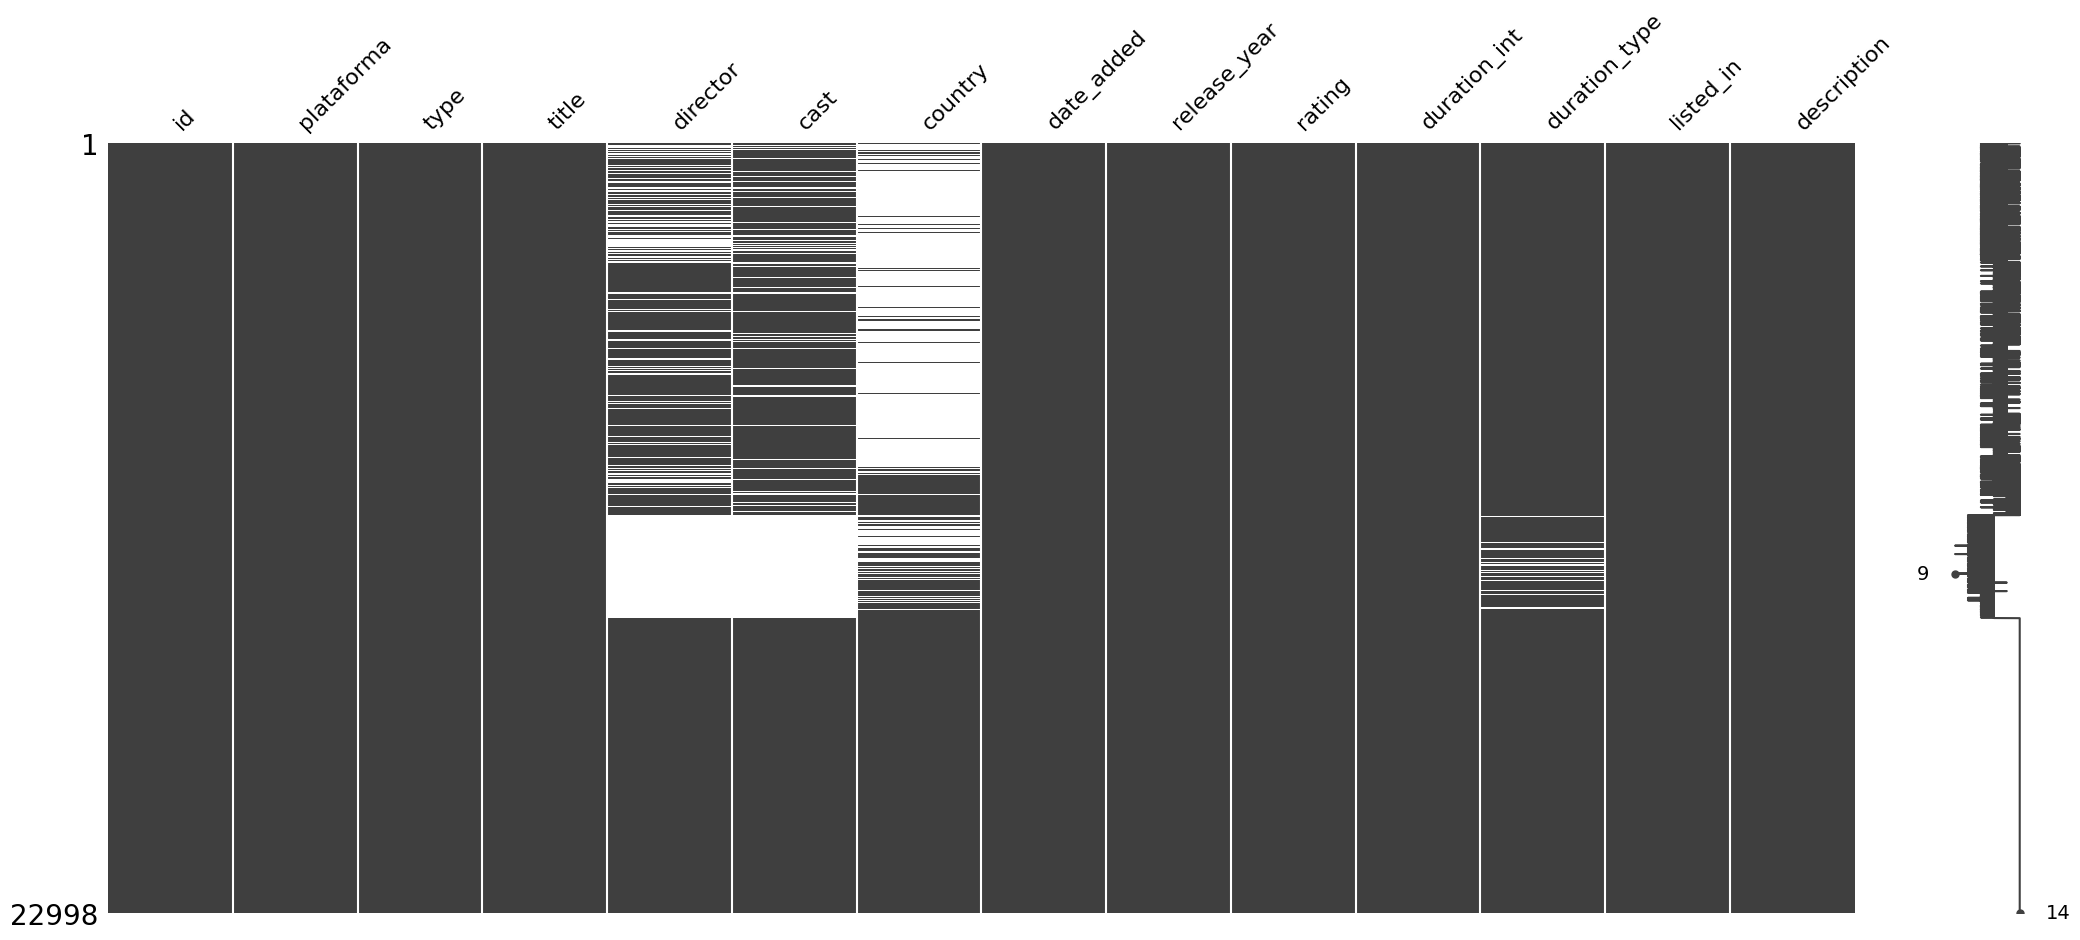

In [157]:
msno.matrix(df_movies)

In [158]:
df_movies.isnull().sum()

id                   0
plataforma           0
type                 0
title                0
director          5626
cast              4496
country          10668
date_added           0
release_year         0
rating               0
duration_int         0
duration_type      479
listed_in            0
description          4
dtype: int64

In [160]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             22998 non-null  object        
 1   plataforma     22998 non-null  category      
 2   type           22998 non-null  category      
 3   title          22998 non-null  object        
 4   director       17372 non-null  object        
 5   cast           18502 non-null  object        
 6   country        12330 non-null  category      
 7   date_added     22998 non-null  datetime64[ns]
 8   release_year   22998 non-null  int64         
 9   rating         22998 non-null  category      
 10  duration_int   22998 non-null  int64         
 11  duration_type  22519 non-null  category      
 12  listed_in      22998 non-null  category      
 13  description    22994 non-null  object        
dtypes: category(6), datetime64[ns](1), int64(2), object(5)
memory usage: 1

In [165]:
df_movies.describe(exclude=None)


,date_added,release_year,duration_int
count,22998,22998.000000,22998.000000
mean,2020-05-30 20:09:27.284111616,2010.811244,66.531872
min,2006-07-14 00:00:00,1920.000000,0.000000
25%,2019-09-28 06:00:00,2010.000000,4.000000
50%,2021-05-07 00:00:00,2016.000000,83.000000
75%,2021-07-14 00:00:00,2019.000000,101.000000
max,2021-11-26 00:00:00,2021.000000,601.000000
std,NaN,15.401142,51.018381
